<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


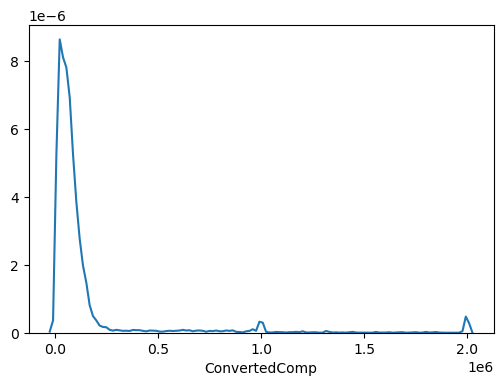

In [19]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.distplot(a=df["ConvertedComp"],hist=False)
plt.show()


Plot the histogram for the column `ConvertedComp`.


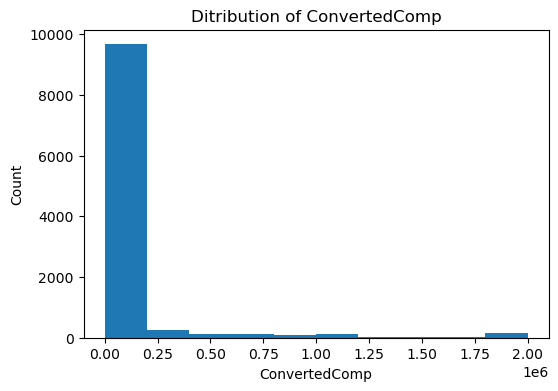

In [100]:
plt.figure(figsize=(6,4))
plt.hist(df['ConvertedComp'])
plt.xlabel('ConvertedComp')
plt.ylabel('Count')
plt.title('Ditribution of ConvertedComp')
plt.show()


What is the median of the column `ConvertedComp`?


In [24]:

print("convertedComp Median: ", df['ConvertedComp'].median())



convertedComp Median:  57745.0


How many responders identified themselves only as a **Man**?


In [91]:
print(df['Gender'].value_counts(),'\n')

print('Responders identified as a Man:',df['Gender'].value_counts()['Man'])

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64 

Responders identified as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [95]:
df_woman =df[df['Gender']=='Woman']

print(" Median ConvertedComp of responders identified as a Woman: ", df_woman['ConvertedComp'].median())



 Median ConvertedComp of responders identified as a Woman:  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [93]:

df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


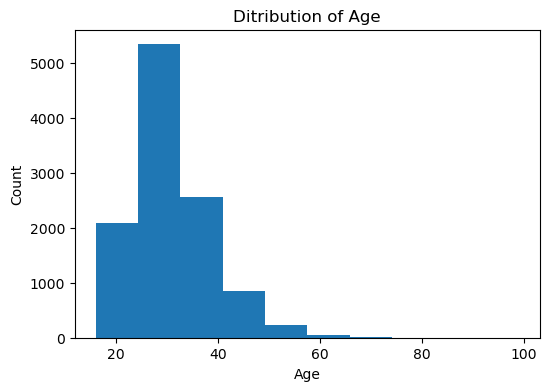

In [101]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ditribution of Age')
plt.show()



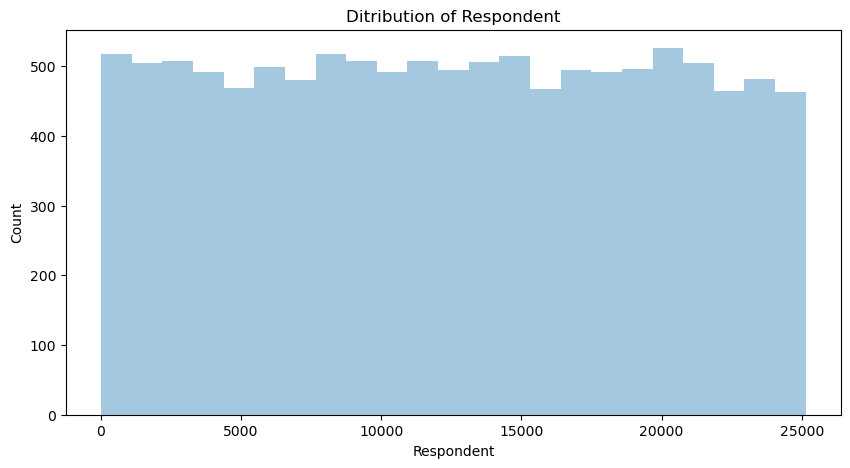

In [102]:
plt.figure(figsize=(10,5))
sns.distplot(df["Respondent"],kde=False)

plt.xlabel('Respondent')
plt.ylabel('Count')
plt.title('Ditribution of Respondent')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


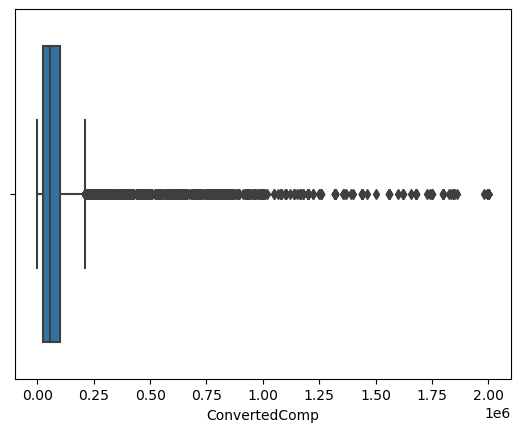

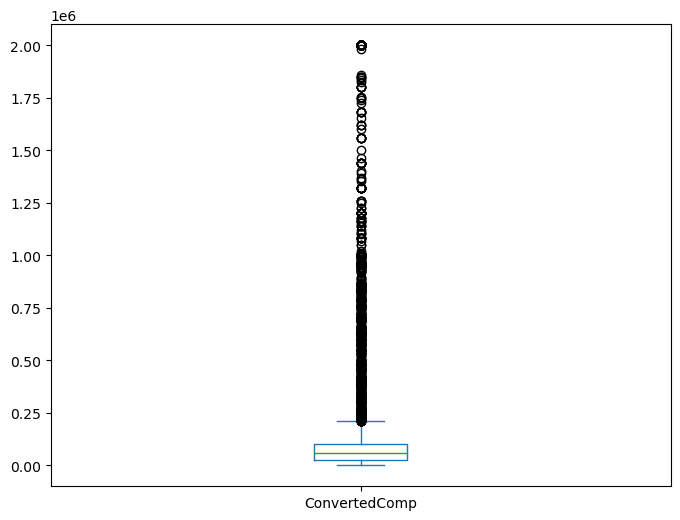

In [40]:
sns.boxplot(x = df['ConvertedComp'], data=df)

#or

df_cv = df[['ConvertedComp']]
df_cv.plot(kind='box', figsize=(8,6))
plt.show()

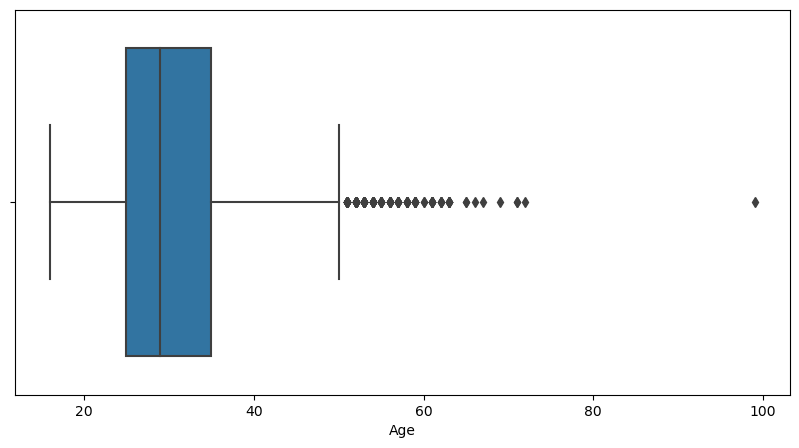

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [95]:
df["ConvertedComp"].describe()


count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [45]:
df['ConvertedComp'].dropna(axis=0, inplace=True)
Q1 = df['ConvertedComp'].quantile(.25)
Q3 = df['ConvertedComp'].quantile(.75)
IQR = Q3 - Q1
print('The Inter Quartile Range for ConvertedComp: ', IQR)


The Inter Quartile Range for ConvertedComp:  73132.0


Find out the upper and lower bounds.


In [53]:
upper = Q3+(IQR*1.5)
lower = Q1-(IQR*1.5)

print('Upper bound: ', upper)
print('Lower bound: ', lower)



Upper bound:  209698.0
Lower bound:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [52]:
#Outliers = (df["ConvertedComp"] < (Q1 - 1.5 * IQR)) | (df["ConvertedComp"] > (Q3 + 1.5 * IQR))

#OR

Outliers= (df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)

Outliers.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [83]:
df_clean = df[(df['ConvertedComp'] > lower) & (df['ConvertedComp'] < upper)]
df_clean.describe()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


In [84]:
df_clean.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [89]:
print(df.corr().Age)
df.corr()


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
